# Load Data

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from a CSV file
data = pd.read_csv('./data/HR_data.csv', index_col=0)

# Basic Data Analysis

## Start

In [20]:
num_cols = data.columns[:51]
cat_cols = data.columns[51:]

print(num_cols)
print(cat_cols)

Index(['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope',
       'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks',
       'EDA_TD_P_RT', 'EDA_TD_P_ReT'],
      dt

In [21]:
print("Shape data:")
print(data.shape)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values in each column:")
nan_info = data.isnull().sum()
print(nan_info[nan_info != 0])

Shape data:
(312, 67)
First few rows of the dataset:
   HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0   78.663878         76.70   7.480043      67.25      92.48  23048.450   
1   76.540732         76.61   2.584756      69.82      82.33  23959.920   
2   78.173563         77.92   2.681255      72.22      82.80  20324.605   
3   83.073688         83.88   7.363598      69.42      96.12  24924.300   
4   72.281250         72.91   3.193762      64.95      79.98  23052.100   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  upset  \
0       -1.091448    0.369955          -0.7300           0.9775  ...    1.0   
1       -0.245338    0.338732          -0.3600           0.1900  ...    2.0   
2       -0.615922   -0.233047          -0.6300           0.3575  ...    1.0   
3       -0.866610   -0.046021          -0.4650           0.6500  ...    1.0   
4        0.200401   -0.560948          -0.3725           0.3375  ...    3.0   

   hostile  alert  as

## Transform strings to numericals

In [22]:
from sklearn.preprocessing import LabelEncoder
# Function to convert string columns to numerical
def convert_strings_to_numerical(df):
    label_encoders = {}  # To store label encoder for each string column
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        # Fitting label encoder on the data
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

# Convert string columns to numerical and get the updated DataFrame
data, encoders = convert_strings_to_numerical(data)

# More analysis

## Standardize data

In [23]:
# Standardize
def standardize(X):
    X[num_cols] = (X[num_cols] - X[num_cols].mean()) / X[num_cols].std()
    return X

data = standardize(data)

In [24]:
data[cat_cols]

,Round,Phase,Individual,Puzzler,Frustrated,Cohort,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,2,2,1,1,2.0,3,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,2,1,1,1,3.0,3,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,0,1,1,2.0,3,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,1,2,1,1,2.0,3,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,1,1,1,1,2.0,3,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,3,1,26,1,7.0,4,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
308,3,0,26,1,2.0,4,2.0,1.0,3.0,1.0,1.0,1.0,4.0,1.0,3.0,4.0
309,0,2,26,1,2.0,4,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,4.0
310,0,1,26,1,3.0,4,2.0,1.0,3.0,1.0,3.0,1.0,4.0,1.0,4.0,4.0


## Treat missing data

In [25]:
#data = data.dropna()

In [26]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)

missing_rows = data.isnull().any(axis=1)
missing_cols = missing_data.index

data[missing_rows][missing_cols]

,EDA_TD_P_RT,EDA_TD_P_ReT,attentive,afraid,active,inspired,determined
104,0.696437,-0.196339,NaN,NaN,NaN,2.0,NaN
120,-0.063669,1.117660,2.0,1.0,2.0,2.0,NaN
122,2.994075,0.573621,3.0,1.0,2.0,NaN,3.0
125,0.237947,-0.165677,3.0,4.0,2.0,NaN,2.0
272,NaN,NaN,3.0,1.0,3.0,2.0,3.0


In [27]:
# Calculate mean of the column within the same Round, Phase, Puzzler and Cohort
means_for_missing = data.groupby(['Round', 'Phase', 'Puzzler', 'Cohort']).mean().reset_index()

# Replace missing values
for index, row in data.iterrows():
    if row.isnull().any():
        mean_row = means_for_missing[(means_for_missing['Round'] == row['Round']) 
                                     & (means_for_missing['Phase'] == row['Phase']) 
                                     & (means_for_missing['Puzzler'] == row['Puzzler']) 
                                     & (means_for_missing['Cohort'] == row['Cohort'])]
        
        # only replace the values that are missing
        for col in row[row.isnull()].index:
            # round the questionnaire values
            if col in ['attentive', 'afraid', 'active', 'inspired', 'determined']:
                data.at[index, col] = np.round(mean_row[col].values[0])
            else:
                data.at[index, col] = mean_row[col].values[0]

# Check that it works as expected
data[missing_rows][missing_cols]

,EDA_TD_P_RT,EDA_TD_P_ReT,attentive,afraid,active,inspired,determined
104,0.696437,-0.196339,3.0,1.0,2.0,2.0,3.0
120,-0.063669,1.117660,2.0,1.0,2.0,2.0,2.0
122,2.994075,0.573621,3.0,1.0,2.0,2.0,3.0
125,0.237947,-0.165677,3.0,4.0,2.0,2.0,2.0
272,1.205642,0.640830,3.0,1.0,3.0,2.0,3.0


## Save data

In [28]:
individuals = data["Individual"]
cohorts = data["Cohort"]
puzzlers = data["Puzzler"]

In [29]:
# exclude_columns = ["Individual"]
# data = data[[c for c in num_cols if c not in exclude_columns] + [c for c in cat_cols if c not in exclude_columns]]

## One-Hot Encode

In [30]:
# List of columns you want to one-hot encode
columns_to_encode = ["Cohort", "Puzzler"
                    #  , "Individual"
                     ]
saved_encoded_columns = data[columns_to_encode]
# Perform one-hot encoding on specified columns
encoded_data = pd.get_dummies(data, columns=columns_to_encode, dtype=int)

# Display the first few rows of the updated dataset
print("First few rows of the updated dataset with one-hot encoding:")
print(encoded_data.head())

data = encoded_data

First few rows of the updated dataset with one-hot encoding:
   HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0    0.010007     -0.062252   0.186914  -0.163617   0.001626  -0.312025   
1   -0.176517     -0.069694  -0.792361   0.111511  -0.569893  -0.086150   
2   -0.033069      0.038626  -0.773057   0.368440  -0.543429  -0.987033   
3    0.397420      0.531440   0.163620   0.068689   0.206585   0.152837   
4   -0.550724     -0.375636  -0.670533  -0.409841  -0.702215  -0.311121   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  active  \
0       -0.620396   -0.007311        -0.414192         0.976552  ...     2.0   
1       -0.114098   -0.045208         0.531521        -0.698825  ...     3.0   
2       -0.335849   -0.739221        -0.158594        -0.342475  ...     3.0   
3       -0.485856   -0.512212         0.263143         0.279808  ...     3.0   
4        0.152625   -1.137219         0.499571        -0.385024  ...     4.0   

   dete

In [31]:
data.columns

Index(['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope',
       'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks',
       'EDA_TD_P_RT', 'EDA_TD_P_ReT', 'Round', 

In [32]:
cat_cols[6:]

Index(['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'attentive', 'afraid', 'active', 'determined'],
      dtype='object')

In [33]:
hr_td_cols = ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope']
temp_td_cols = ['TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope']
eda_td_p_cols = ['EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_P_Peaks',
       'EDA_TD_P_RT', 'EDA_TD_P_ReT']
eda_td_t_cols = ['EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope']

quest_cols = [cat_cols[4]] + list(cat_cols[6:])

divided_cols = [hr_td_cols, temp_td_cols, eda_td_p_cols, eda_td_t_cols, quest_cols]

In [34]:
quest_cols

['Frustrated',
 'upset',
 'hostile',
 'alert',
 'ashamed',
 'inspired',
 'nervous',
 'attentive',
 'afraid',
 'active',
 'determined']

In [35]:
data['Phase']

0      2
1      1
2      0
3      2
4      1
      ..
307    1
308    0
309    2
310    1
311    0
Name: Phase, Length: 312, dtype: int32

In [36]:
order = data['Round']*3+data['Phase']
data['Order'] = data['Round']*3+data['Phase']

In [37]:
def get_data(col):
    if col in data.columns:
        return data[col]
    return saved_encoded_columns[col]

### Different phases

In [38]:
data['Phase'].value_counts()

Phase
2    104
1    104
0    104
Name: count, dtype: int64

In [39]:
data = data.sort_values(by='Phase')

# Analysis By Individuals

In [40]:
data[['Round', 'Phase']]

,Round,Phase
155,0,0
146,2,0
149,1,0
152,3,0
158,2,0
...,...,...
186,3,2
189,0,2
192,2,2
177,0,2


In [41]:
itercols = quest_cols

indiv = [{} for _ in range(1, 27)]
for i, row in data.iterrows():
    for col in itercols:
        indiv[int(row['Individual'])-1][f"{col}_{int(row['Order'])}"] = row[col]

In [42]:
newdata = pd.DataFrame(indiv)

In [43]:
quest_cols

['Frustrated',
 'upset',
 'hostile',
 'alert',
 'ashamed',
 'inspired',
 'nervous',
 'attentive',
 'afraid',
 'active',
 'determined']

In [44]:
from scipy.interpolate import make_interp_spline  # For smoothing

def plot_sentiment_by_individual(indata, sentiment, clipmin=0, clipmax=10, figsize=(16, 8)):

    num_columns = 12
    x = np.arange(num_columns)
    # Plotting
    plt.figure(figsize=figsize)  # Set the figure size
    # Plot a line for each row in the dataframe
    toplot = indata[[f'{sentiment}_{i}' for i in range(12)]]
    
    for index, row in toplot.iterrows():
        # Create a smooth x-array
        x_smooth = np.linspace(x.min(), x.max(), 200)  # Increasing resolution for smoother lines
        
        # Create a spline interpolation for smoothing
        spline = make_interp_spline(x, row, k=3)  # k=3 for cubic spline (smoothest)

        # Get y-values for the smooth x-array
        y_smooth = spline(x_smooth)
        # Ensure that the smoothed y-values do not go below zero
        y_smooth = np.clip(y_smooth, a_min=clipmin, a_max=clipmax)
        
        # Plot the smoothed line
        plt.plot(x_smooth, y_smooth, label=f'Individual {index + 1}', color='tab:blue', alpha=0.5)
        # plt.plot([i for i in range(12)], [row[f'Frustrated_{i}'] for i in range(12)], label=f'Individual {index + 1}')

    # Calculate the mean across rows and smooth it
    mean_row = toplot.mean()  # Calculate the mean for each column
    spline_mean = make_interp_spline(x, mean_row, k=3)  # Create a spline for the mean
    x_smooth_mean = np.linspace(x.min(), x.max(), 200)  # Smooth x-array for the mean
    y_smooth_mean = spline_mean(x_smooth_mean)  # Smoothed mean y-values
    y_smooth_mean = np.clip(y_smooth_mean, a_min=0, a_max=None)
    # Plot the mean line in a different color
    plt.plot(x_smooth_mean, y_smooth_mean, label='Mean', linewidth=2, linestyle='--', color='red')

    # Calculate the standard deviation across rows and smooth it
    std_row = toplot.std()  # Calculate the standard deviation for each column
    spline_std = make_interp_spline(x, std_row, k=3)  # Create a spline for the standard deviation
    x_smooth_std = np.linspace(x.min(), x.max(), 200)  # Smooth x-array for the standard deviation
    y_smooth_std = spline_std(x_smooth_std)  # Smoothed standard deviation y-values
    y_smooth_std = np.clip(y_smooth_std, a_min=clipmin, a_max=clipmax)  # Ensure no negative values

    # Plot the standard deviation line
    plt.plot(x_smooth_std, y_smooth_mean-y_smooth_std, label='Standard Deviation', linewidth=2, linestyle='-', color='blue')
    plt.plot(x_smooth_std, y_smooth_mean+y_smooth_std, label='Standard Deviation', linewidth=2, linestyle='-', color='blue')

    # Add vertical lines to separate rounds between phase 2 and phase 0
    round_dividers = [2.5, 5.5, 8.5]  # Dividers between phases
    for divider in round_dividers:
        plt.axvline(x=divider, color='black', linestyle='--', linewidth=1)  # Vertical divider

    # Annotate phases and rounds
    phase_labels = ["Phase 0", "Phase 1", "Phase 2"] * 4  # Labels for each phase
    x_ticks_positions = np.arange(num_columns)  # Positions for x-ticks

    plt.xticks(x_ticks_positions, phase_labels, rotation=45)  # Add x-ticks with phase labels


    # Adding labels and title
    plt.xlabel('Observation Points')  # X-axis label
    plt.ylabel(f'{sentiment} Level')  # Y-axis label
    plt.title(f'{sentiment} Trends for Each Individual')  # Plot title

    # Adding a legend to identify each individual
    # plt.legend(loc='upper left')

    # Show the plot
    plt.show()

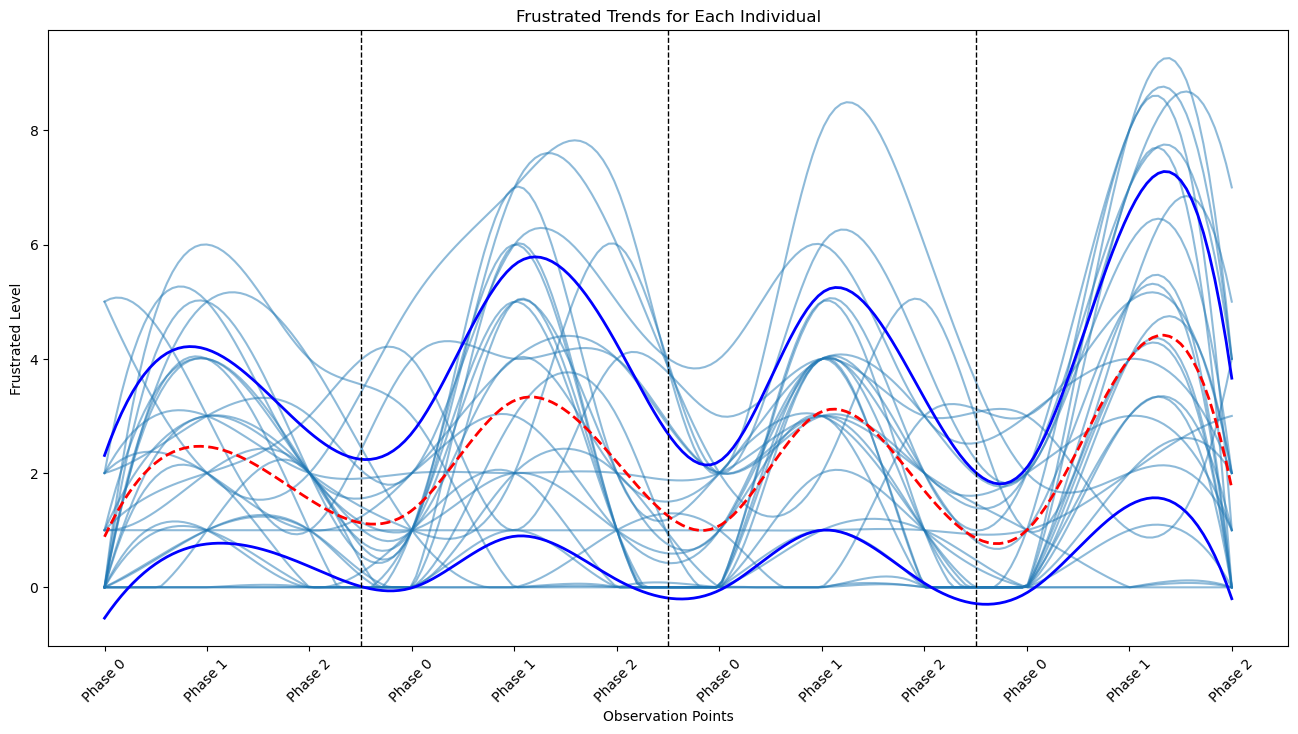

In [45]:
plot_sentiment_by_individual(newdata,"Frustrated", figsize=(16,8))

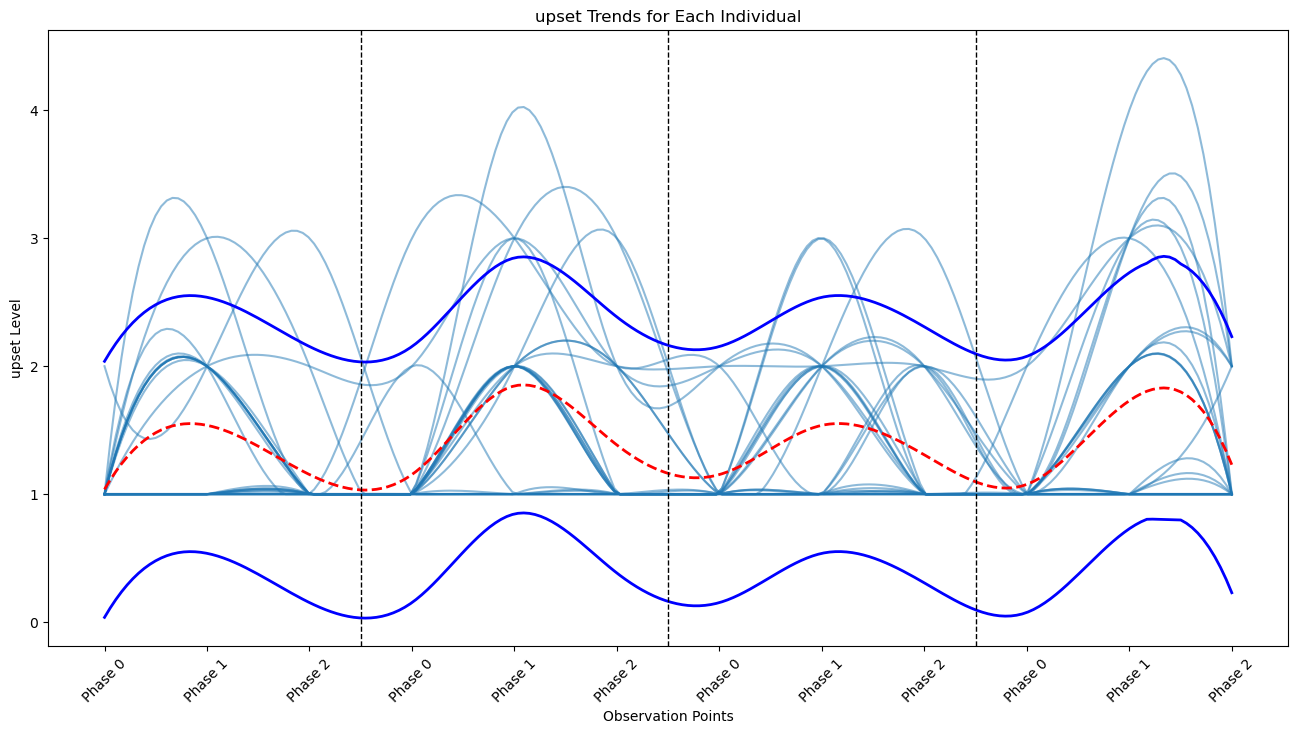

In [46]:
plot_sentiment_by_individual(newdata,"upset", clipmin=1, clipmax=5, figsize=(16,8))

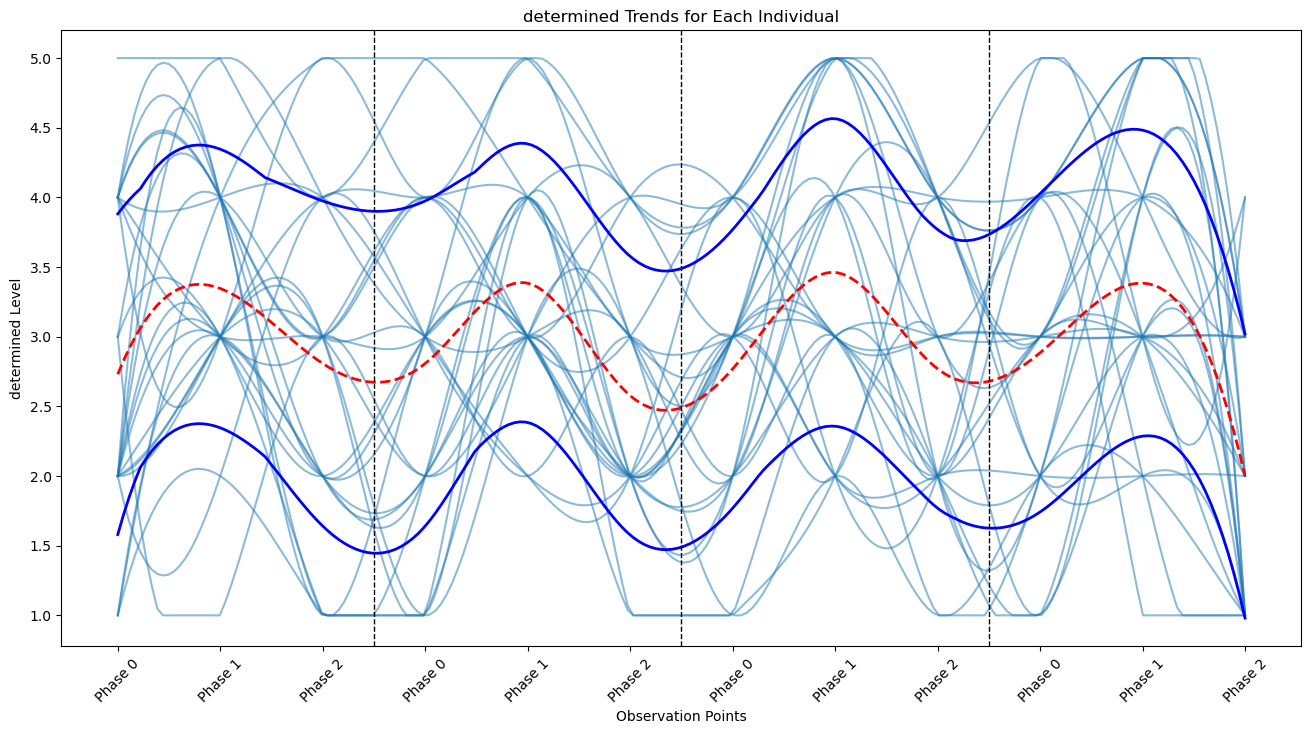

In [47]:
plot_sentiment_by_individual(newdata,"determined", clipmin=1, clipmax=5, figsize=(16,8))

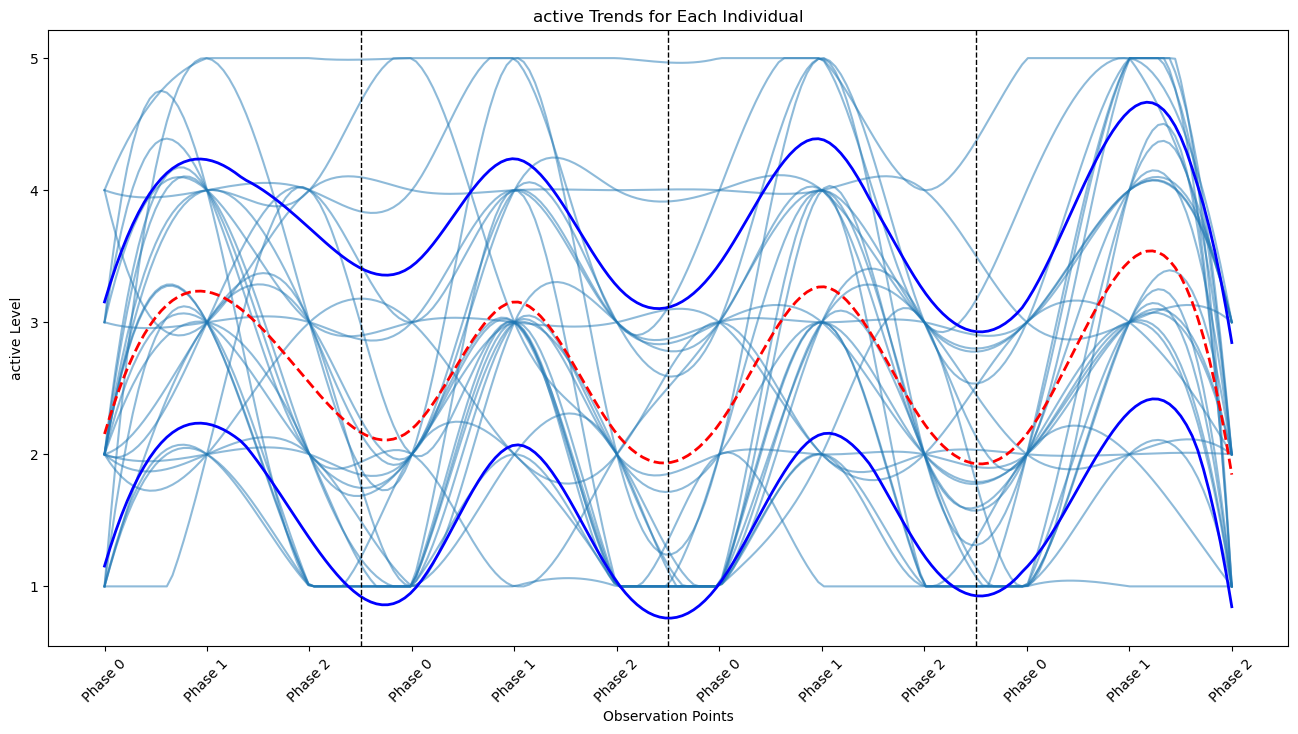

In [48]:
plot_sentiment_by_individual(newdata,"active", clipmin=1, clipmax=5, figsize=(16,8))

# Clustering

In [81]:
from tslearn.clustering import TimeSeriesKMeans  
from scipy.interpolate import make_interp_spline  # For smoothing
from numpy import gradient  # For calculating derivatives

def plot_clusters_by_sentiment_by_individual(indata, sentiment, include_derivatives = False, num_clusters=3, clipmin=0, clipmax=10, figsize=(16, 8)):
    # Define colors for different clusters
    cluster_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']  # Custom colors for clusters

    toplot = indata[[f'{sentiment}_{i}' for i in range(12)]]

    num_columns = 12
    x = np.arange(num_columns)
    # Plotting
    plt.figure(figsize=figsize)  # Set the figure size
    # Create a smooth x-array
    x_smooth = np.linspace(x.min(), x.max(), 200)  # Increasing resolution for smoother lines
    # Plot a line for each row in the dataframe
    df = pd.DataFrame(columns = x_smooth)

    for index, row in toplot.iterrows():
        # Create a spline interpolation for smoothing
        spline = make_interp_spline(x, row, k=3)  # k=3 for cubic spline (smoothest)

        # Get y-values for the smooth x-array
        y_smooth = spline(x_smooth)
        # Ensure that the smoothed y-values do not go below zero
        y_smooth = np.clip(y_smooth, a_min=clipmin, a_max=clipmax)
        df.loc[len(df)] = y_smooth

    if include_derivatives:
    # Calculate the first and second derivatives
        df['First_Derivative'] = df.apply(lambda row: list(gradient(row)), axis=1)  # First derivative
        df['Second_Derivative'] = df.apply(lambda row: list(gradient(row['First_Derivative'])), axis=1)  # Second derivative

        # Combine original data, first derivative, and second derivative for clustering
        derivative_features = np.concatenate(
            [df.drop(columns=['First_Derivative', 'Second_Derivative']).values, 
            np.vstack(df['First_Derivative']), 
            np.vstack(df['Second_Derivative'])], axis=1
        )
        df = df.drop(columns=['First_Derivative', 'Second_Derivative'])

    # Perform k-means clustering with DTW
    ts_kmeans = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw", random_state=0)  # Initialize TimeSeriesKMeans with DTW
    if include_derivatives:
        cluster = ts_kmeans.fit_predict(derivative_features)
    else:
        cluster = ts_kmeans.fit_predict(df)
    for index, row in df.iterrows():
        
        # Plot the smoothed line
        cluster_color = cluster_colors[cluster[index]]  # Color based on cluster assignment
        plt.plot(x_smooth, row, label=f'Individual {index + 1}', color=cluster_color, alpha=0.7)


    # Add vertical lines to separate rounds between phase 2 and phase 0
    round_dividers = [2.5, 5.5, 8.5]  # Dividers between phases
    for divider in round_dividers:
        plt.axvline(x=divider, color='black', linestyle='--', linewidth=1)  # Vertical divider

    # Annotate phases and rounds
    phase_labels = ["Phase 0", "Phase 1", "Phase 2"] * 4  # Labels for each phase
    x_ticks_positions = np.arange(num_columns)  # Positions for x-ticks

    plt.xticks(x_ticks_positions, phase_labels, rotation=45)  # Add x-ticks with phase labels


    # Adding labels and title
    plt.xlabel('Observation Points')  # X-axis label
    plt.ylabel(f'{sentiment} Level')  # Y-axis label
    plt.title(f'{sentiment} Trends for Each Individual')  # Plot title

    # Adding a legend to identify each individual
    # plt.legend(loc='upper left')

    # Show the plot
    plt.show()

    # Create a plot to summarize the clusters
    plt.figure(figsize=(12, 6))  # Set the figure size

    # Set x-values for the original points
    x = np.arange(num_columns)

    # Iterate over each cluster and plot the mean and standard deviation
    for cluster_idx in range(num_clusters):
        # Get the data for the current cluster
        cluster_data = df.iloc[cluster == cluster_idx]

        # Calculate the mean for the current cluster
        cluster_mean = cluster_data.mean()

        # Calculate the standard deviation for the current cluster
        cluster_std = cluster_data.std()

        # Smooth the means and standard deviations with cubic splines
        spline_mean = make_interp_spline(x_smooth, cluster_mean, k=3)  # Create a spline for the mean
        spline_std = make_interp_spline(x_smooth, cluster_std, k=3)  # Create a spline for the standard deviation


        # Get the smoothed mean and standard deviation
        y_smooth_mean = spline_mean(x_smooth)
        y_smooth_std = spline_std(x_smooth)

        # Ensure no negative values for standard deviation
        y_smooth_std = np.clip(y_smooth_std, a_min=0, a_max=None)

        # Plot the mean for the current cluster
        plt.plot(x_smooth, y_smooth_mean, label=f'Cluster {cluster_idx + 1} Mean ({len(cluster_data)})', color=cluster_colors[cluster_idx], linestyle='--')

        # Plot the standard deviation for the current cluster as a shaded area
        plt.fill_between(x_smooth, y_smooth_mean - y_smooth_std, y_smooth_mean + y_smooth_std, color=cluster_colors[cluster_idx], alpha=0.3, label=f'Cluster {cluster_idx + 1} Std Dev')

    # Adding labels and title
    plt.xlabel('Observation Points')  # X-axis label
    plt.ylabel(f'{sentiment} Level')  # Y-axis label
    plt.title(f'Clustered Data for {sentiment}: Mean and Standard Deviation Summary')  # Plot title

    # Add vertical lines to separate rounds between phase 2 and phase 0
    round_dividers = [2.5, 5.5, 8.5]  # Dividers between phases
    for divider in round_dividers:
        plt.axvline(x=divider, color='black', linestyle='--', linewidth=1)  # Vertical divider

    # Annotate phases and rounds
    phase_labels = ["Phase 0", "Phase 1", "Phase 2"] * 4  # Labels for each phase
    x_ticks_positions = np.arange(num_columns)  # Positions for x-ticks

    plt.xticks(x_ticks_positions, phase_labels, rotation=45)  # Add x-ticks with phase labels


    # Adding a legend to identify the clusters
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()
    return cluster

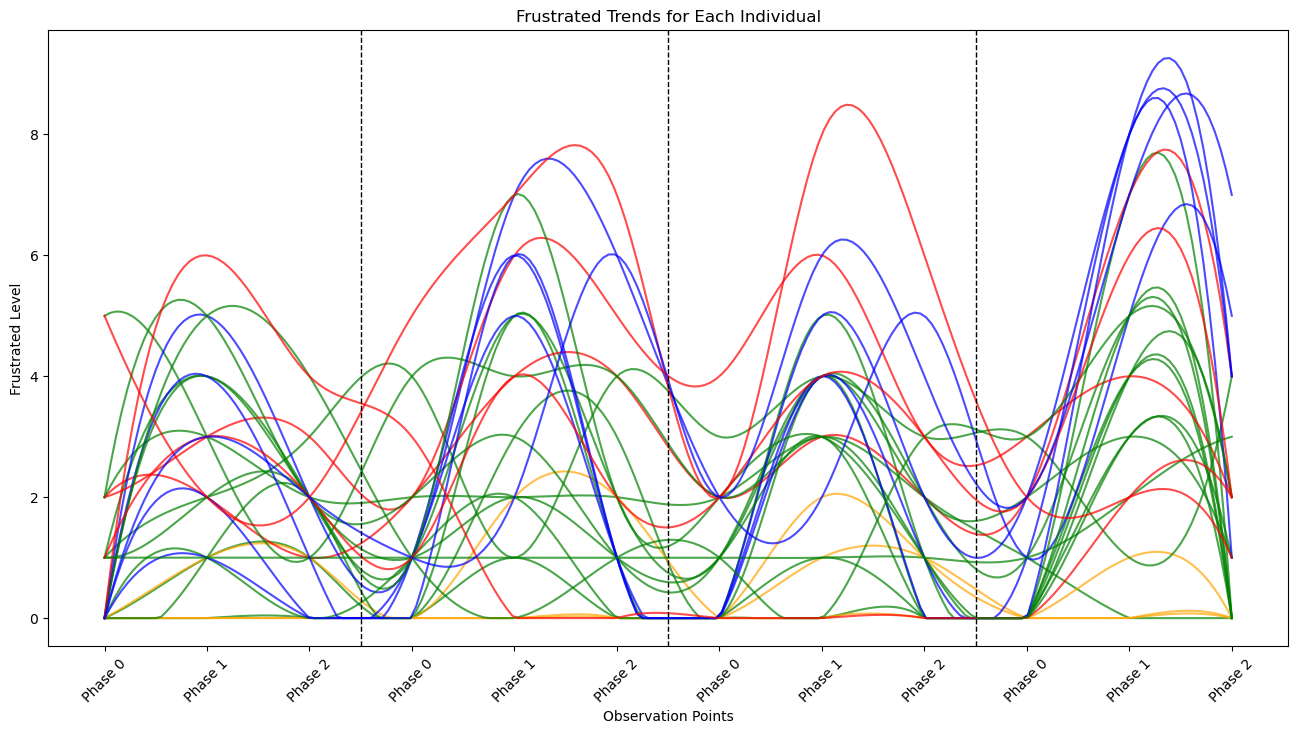

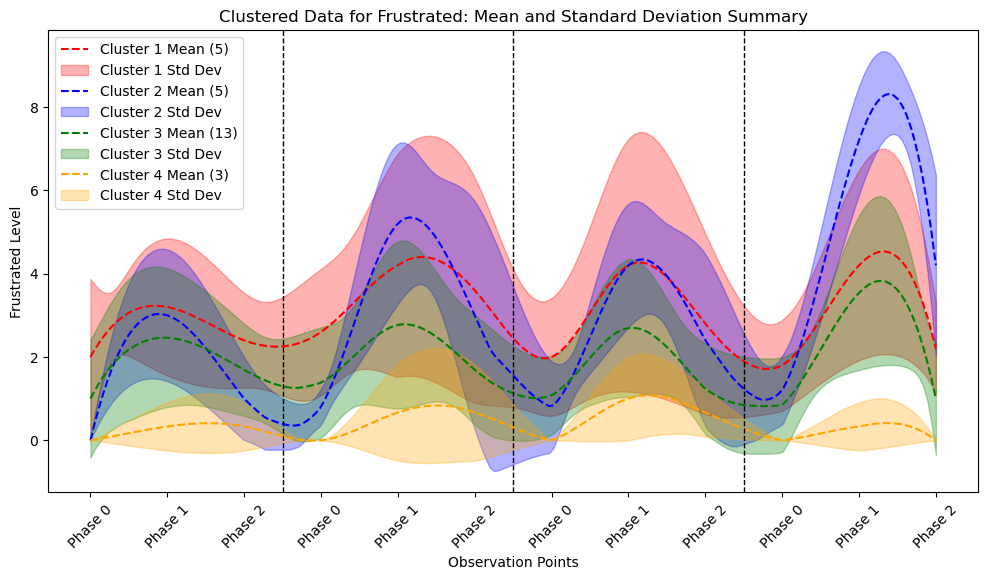

In [98]:
cluster = plot_clusters_by_sentiment_by_individual(newdata,"Frustrated", include_derivatives=True, num_clusters=4, clipmin=0, clipmax=10, figsize=(16,8))

In [132]:
ind_cohort = {j: c for j,c in zip(individuals, cohorts)}
ind_cohort_list = [ind_cohort[j+1] for j in range(26)]

In [134]:
from collections import Counter
Counter(ind_cohort_list)

Counter({0: 8, 1: 6, 3: 4, 2: 4, 5: 2, 4: 2})

In [135]:
cluster

array([2, 2, 3, 3, 2, 3, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 0,
       2, 0, 0, 1], dtype=int64)

In [136]:
Counter(cluster)

Counter({2: 13, 0: 5, 1: 5, 3: 3})

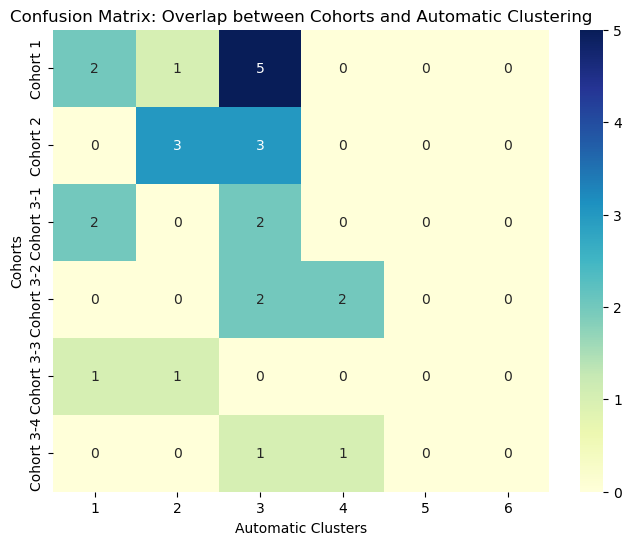

In [146]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix to assess the overlap
conf_matrix = confusion_matrix(ind_cohort_list,cluster)

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Cohort 1', 'Cohort 2', 'Cohort 3-1', 'Cohort 3-2', 'Cohort 3-3', 'Cohort 3-4'], 
                              columns=['1', '2', '3', '4', '5', '6'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Automatic Clusters')  # X-axis label
plt.ylabel('Cohorts')  # Y-axis label
plt.title('Confusion Matrix: Overlap between Cohorts and Automatic Clustering')
plt.show()